# Sentiment Analysis

## Importing Libraries

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neetu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
! pip install finvader

## Dataset Download

In [8]:
# Reading of the dataset & Renaming Columns

df = pd.read_csv('Sentiment_All_3.csv', encoding = 'latin-1')
df = df.rename(columns={'neutral': 'Sentiment', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .' : 'Text' })
df.head(20)

,Sentiment,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5,positive,"For the last quarter of 2010 , Componenta 's n..."
6,positive,"In the third quarter of 2010 , net sales incre..."
7,positive,Operating profit rose to EUR 13.1 mn from EUR ...
8,positive,"Operating profit totalled EUR 21.1 mn , up fro..."
9,positive,TeliaSonera TLSN said the offer is in line wit...


In [9]:
# Information about the dataset

print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   Text       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


       Sentiment                                               Text
count       4845                                               4845
unique         3                                               4837
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2878                                                  2


# Sentiment Analysis

## Pre Processing for Lexicon models

In [10]:
# Checking for the Null Value
df.isnull().sum()

Sentiment    0
Text         0
dtype: int64

In [11]:
# Making the Dataset uniform case before passing it to the model
for i in df.columns:
  df[i] = df[i].str.lower()

In [12]:
#Dropping of Duplicates
df.drop_duplicates(subset=['Text'],keep='first',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4837 non-null   object
 1   Text       4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [14]:
# Copy of the Dataset for testing models 
# -- FINVADER & VADERSENTIMENT

df_vaderSentiment = df.copy()
df_finVader = df.copy()
df_finBert = df.copy()

## Pre Processing for AI models

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# function to remove URL from dataframe.
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def remove_urls(text):
    return url_pattern.sub(r'', text)

In [17]:
# Call method to remove URL
df['Text'] = df['Text'].apply(remove_urls)

#Removing remove non-word and non-whitespace characters
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)

# Removing Digits
df = df.replace(to_replace=r'\d', value='', regex=True)

df.head(50)

,Sentiment,Text
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company s updated strategy fo...
4,positive,financing of aspocomp s growth aspocomp is agg...
5,positive,for the last quarter of componenta s net sal...
6,positive,in the third quarter of net sales increased ...
7,positive,operating profit rose to eur mn from eur mn ...
8,positive,operating profit totalled eur mn up from eur...
9,positive,teliasonera tlsn said the offer is in line wit...


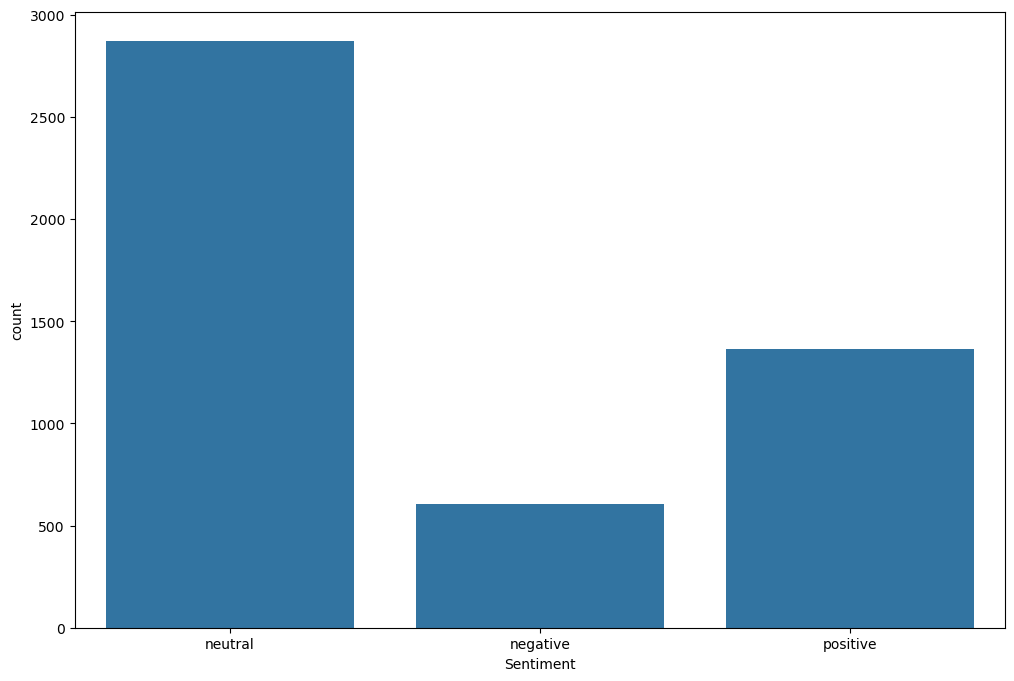

133

In [18]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='Sentiment',data=df)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [19]:
# Tokenisation
# not recommended to run on lexicon-based models
#   -- vaderSentiment
#   -- finVader
# Create another variable and then tokenize
# ***  Lexicon-based models rely on analyzing the sentiment of whole words or phrases within
# the text, and tokenization can disrupt the context and meaning these models depend on.

df_token = df.copy()
df_token['Text'] = df_token['Text'].apply(word_tokenize)

In [20]:
df_token.head(50)

,Sentiment,Text
0,neutral,"[technopolis, plans, to, develop, in, stages, ..."
1,negative,"[the, international, electronic, industry, com..."
2,positive,"[with, the, new, production, plant, the, compa..."
3,positive,"[according, to, the, company, s, updated, stra..."
4,positive,"[financing, of, aspocomp, s, growth, aspocomp,..."
5,positive,"[for, the, last, quarter, of, componenta, s, n..."
6,positive,"[in, the, third, quarter, of, net, sales, incr..."
7,positive,"[operating, profit, rose, to, eur, mn, from, e..."
8,positive,"[operating, profit, totalled, eur, mn, up, fro..."
9,positive,"[teliasonera, tlsn, said, the, offer, is, in, ..."


In [21]:
#Stemming
# cars, car's, cars' all mean car
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

df_token['stemmed_Text'] = df_token['Text'].apply(stem_words)


In [22]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

df_token['lemmatized_Text'] = df_token['Text'].apply(lemmatize_tokens)

In [23]:
df_token.head(50)

,Sentiment,Text,stemmed_Text,lemmatized_Text
0,neutral,"[technopolis, plans, to, develop, in, stages, ...","[technopoli, plan, to, develop, in, stage, an,...","[technopolis, plan, to, develop, in, stage, an..."
1,negative,"[the, international, electronic, industry, com...","[the, intern, electron, industri, compani, elc...","[the, international, electronic, industry, com..."
2,positive,"[with, the, new, production, plant, the, compa...","[with, the, new, product, plant, the, compani,...","[with, the, new, production, plant, the, compa..."
3,positive,"[according, to, the, company, s, updated, stra...","[accord, to, the, compani, s, updat, strategi,...","[accord, to, the, company, s, update, strategy..."
4,positive,"[financing, of, aspocomp, s, growth, aspocomp,...","[financ, of, aspocomp, s, growth, aspocomp, is...","[financing, of, aspocomp, s, growth, aspocomp,..."
5,positive,"[for, the, last, quarter, of, componenta, s, n...","[for, the, last, quarter, of, componenta, s, n...","[for, the, last, quarter, of, componenta, s, n..."
6,positive,"[in, the, third, quarter, of, net, sales, incr...","[in, the, third, quarter, of, net, sale, incre...","[in, the, third, quarter, of, net, sale, incre..."
7,positive,"[operating, profit, rose, to, eur, mn, from, e...","[oper, profit, rose, to, eur, mn, from, eur, m...","[operating, profit, rise, to, eur, mn, from, e..."
8,positive,"[operating, profit, totalled, eur, mn, up, fro...","[oper, profit, total, eur, mn, up, from, eur, ...","[operating, profit, total, eur, mn, up, from, ..."
9,positive,"[teliasonera, tlsn, said, the, offer, is, in, ...","[teliasonera, tlsn, said, the, offer, is, in, ...","[teliasonera, tlsn, say, the, offer, be, in, l..."


In [24]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_token['lemmatized_Text'], df['Sentiment'],test_size=0.3)

In [25]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [26]:
df_token['lemmatized_Text'] = df_token['lemmatized_Text'].astype(str)

In [27]:
# Word Vectorization

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_token['lemmatized_Text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X.apply(lambda x: ' '.join(x)))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.apply(lambda x: ' '.join(x)))

## Vader Sentiment



In [28]:
df_vaderSentiment.head()

,Sentiment,Text
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company 's updated strategy f...
4,positive,financing of aspocomp 's growth aspocomp is ag...


In [29]:
df_vaderSentiment.tail()

,Sentiment,Text
4840,negative,london marketwatch -- share prices ended lower...
4841,neutral,rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,operating profit fell to eur 35.4 mn from eur ...
4843,negative,net sales of the paper segment decreased to eu...
4844,negative,sales in finland decreased by 10.5 % in januar...


NLP Tools Installation

In [27]:
!pip install vaderSentiment

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

analyser = SentimentIntensityAnalyzer()

In [29]:
#Function to calculate sentiment_Vader
def getSIA(text):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(text)
    compound = score['compound']

    sentiment = 'Neutral'
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'

    return sentiment

In [30]:
def getSentiment(val):
    if val >= 0.05:
        return 'Positive'
    elif val <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [31]:
compound = []
pos = []
neg = []
neu = []
predicted_sentiment = []

for i in df_vaderSentiment['Text']:
    score = analyser.polarity_scores(i)
    compound.append(score['compound'])
    pos.append(score['pos'])
    neg.append(score['neg'])
    neu.append(score['neu'])
    predicted_sentiment.append(getSentiment(score['compound']))

In [32]:
df_vaderSentiment['compound'] = compound
df_vaderSentiment['pos'] = pos
df_vaderSentiment['neg'] = neg
df_vaderSentiment['neu'] = neu
df_vaderSentiment["predicted_sentiment"] = predicted_sentiment

In [33]:
df_vaderSentiment.head()

,Sentiment,Text,compound,pos,neg,neu,predicted_sentiment
0,neutral,technopolis plans to develop in stages an area...,-0.2960,0.000,0.068,0.932,Negative
1,negative,the international electronic industry company ...,0.0000,0.000,0.000,1.000,Neutral
2,positive,with the new production plant the company woul...,0.8555,0.295,0.037,0.668,Positive
3,positive,according to the company 's updated strategy f...,0.6705,0.124,0.000,0.876,Positive
4,positive,financing of aspocomp 's growth aspocomp is ag...,0.1796,0.169,0.146,0.684,Positive


In [34]:
#df_vaderSentiment['Sentiment'] = df_vaderSentiment['Sentiment'].str.lower()
df_vaderSentiment['predicted_sentiment'] = df_vaderSentiment['predicted_sentiment'].str.lower()

accuracy_vaderSentiment = accuracy_score(df_vaderSentiment['Sentiment'], df_vaderSentiment['predicted_sentiment'])
accuracy_vaderSentiment

0.5437254496588795

CONFUSION MATRIX
 [[ 180  186  238]
 [ 192 1487 1192]
 [  68  331  963]]


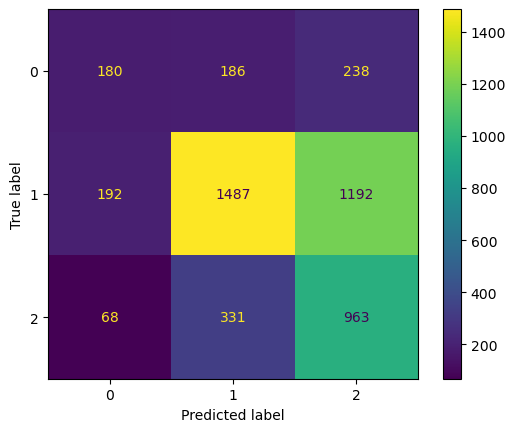

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(df_vaderSentiment['Sentiment'], df_vaderSentiment['predicted_sentiment'])
print('CONFUSION MATRIX\n', confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()

In [36]:
print(metrics.classification_report(df_vaderSentiment['Sentiment'], df_vaderSentiment['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.41      0.30      0.34       604
     neutral       0.74      0.52      0.61      2871
    positive       0.40      0.71      0.51      1362

    accuracy                           0.54      4837
   macro avg       0.52      0.51      0.49      4837
weighted avg       0.60      0.54      0.55      4837



In [37]:
df['vaderSentiment'] = df_vaderSentiment['predicted_sentiment']

In [38]:
df.head()

,Sentiment,Text,vaderSentiment
0,neutral,technopolis plans to develop in stages an area...,negative
1,negative,the international electronic industry company ...,neutral
2,positive,with the new production plant the company woul...,positive
3,positive,according to the company s updated strategy fo...,positive
4,positive,financing of aspocomp s growth aspocomp is agg...,positive


## Fin Vader

In [39]:
!pip install finVader

In [40]:
# Importing models & Evaluation model

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from Henry import *
from SentiBignomics import *

In [41]:
df_finVader.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4837 non-null   object
 1   Text       4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [42]:
def finvader(text = 'str', indicator = 'str', use_sentibignomics: bool= True, use_henry: bool= True):
    
    def Merge(dict1, dict2):       # merge two dictionaries
        res = {**dict1, **dict2}
        return res
     
    if use_sentibignomics is True and use_henry is False:
        sentibignomics = lexicon1()
        constant = 0.1  # parameter for tuning classification accurancy
        sentibignomics.update((key, value * constant) for key, value in sentibignomics.items())
        vader1 = SentimentIntensityAnalyzer()
        vader1.lexicon.update(sentibignomics)

        if indicator == "compound":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['neu']

    elif use_henry is True and use_sentibignomics is False:
        henry = lexicon2()
        vader2 = SentimentIntensityAnalyzer()
        vader2.lexicon.update(henry)

        if indicator == "compound":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['neu']


    elif use_henry is True and use_sentibignomics is True:
        sentibignomics = lexicon1()
        constant = 0.1  # parameter for tuning classification accurancy
        sentibignomics.update((key, value * constant) for key, value in sentibignomics.items())
        henry = lexicon2()
        SentiBignomics_Henry = Merge(sentibignomics, henry) # combined lexicon
        vader3 = SentimentIntensityAnalyzer()
        vader3.lexicon.update(SentiBignomics_Henry)

        if indicator == "compound":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['neu']

    return sentiment

In [43]:
# lexicons included are sentibignomics and henry

df_finVader['finvader'] = df_finVader.Text.apply(finvader, use_sentibignomics = True, use_henry = True, indicator='compound')

In [44]:
df_finVader['finvader'] = np.where(df_finVader['finvader'] > 0.32, "positive",
                                 np.where(df_finVader['finvader'] < -0.32, "negative", "neutral"))

# This creates a new column named 'sentiment' with the assigned values

In [45]:
df_finVader.head(100)

,Sentiment,Text,finvader
0,neutral,technopolis plans to develop in stages an area...,neutral
1,negative,the international electronic industry company ...,neutral
2,positive,with the new production plant the company woul...,positive
3,positive,according to the company 's updated strategy f...,positive
4,positive,financing of aspocomp 's growth aspocomp is ag...,positive
...,...,...,...
96,positive,net sales of finnish food industry company l+æ...,positive
97,positive,an individual promotion also generated slightl...,neutral
98,positive,biohit already services many current genesis c...,positive
99,positive,both operating profit and turnover for the thr...,positive


In [46]:
df_finVader.tail(100)

,Sentiment,Text,finvader
4745,negative,"nokia shares hit 13.21 euros on friday , down ...",neutral
4746,negative,operating profit decreased to eur 11.2 mn from...,negative
4747,negative,operating profit decreased to nearly eur 1.7 m...,negative
4748,negative,operating profit fell to eur 20.3 mn from eur ...,negative
4749,negative,operating profit in the fourth quarter fell to...,negative
...,...,...,...
4840,negative,london marketwatch -- share prices ended lower...,negative
4841,neutral,rinkuskiai 's beer sales fell by 6.5 per cent ...,negative
4842,negative,operating profit fell to eur 35.4 mn from eur ...,negative
4843,negative,net sales of the paper segment decreased to eu...,neutral


In [47]:
from sklearn import metrics
df_finVader['Sentiment'] = df_finVader['Sentiment'].str.lower()
df_finVader['finvader'] = df_finVader['finvader'].str.lower()

accuracy_finVader = metrics.accuracy_score(df_finVader['Sentiment'], df_finVader['finvader'])
accuracy_finVader

0.6971263179656813

In [48]:
print(metrics.classification_report(df_finVader['Sentiment'], df_finVader['finvader']))

              precision    recall  f1-score   support

    negative       0.68      0.47      0.56       604
     neutral       0.74      0.78      0.76      2871
    positive       0.60      0.62      0.61      1362

    accuracy                           0.70      4837
   macro avg       0.68      0.62      0.64      4837
weighted avg       0.70      0.70      0.69      4837



In [49]:
df['finVader'] = df_finVader['finvader']

In [50]:
df.head()

,Sentiment,Text,vaderSentiment,finVader
0,neutral,technopolis plans to develop in stages an area...,negative,neutral
1,negative,the international electronic industry company ...,neutral,neutral
2,positive,with the new production plant the company woul...,positive,positive
3,positive,according to the company s updated strategy fo...,positive,positive
4,positive,financing of aspocomp s growth aspocomp is agg...,positive,positive


## FinBERT

In [30]:
!pip install transformers torch

In [31]:
import scipy
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
import warnings
warnings.filterwarnings("ignore")

D:\Anaconda\Anaconda_Software\envs\SentimentAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
#Then, from the HuggingFace Model Hub, we'll download the pre-trained tokenizer, 
# which is used to convert text into tokens that NLP models can understand. 
# We also load the pre-trained model itself in a similar way. 

X = df_finBert['Text'].to_list()
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [33]:
preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model_finbert(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip( 
            model_finbert.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentimentFinbert = max(scores, key=scores.get)
    probabilityFinbert = max(scores.values())
    preds.append(sentimentFinbert)
    preds_proba.append(probabilityFinbert)

In [34]:
df_finBert['predicted_finbert'] = preds

In [35]:
df_finBert.head()

,Sentiment,Text,predicted_finbert
0,neutral,technopolis plans to develop in stages an area...,neutral
1,negative,the international electronic industry company ...,negative
2,positive,with the new production plant the company woul...,positive
3,positive,according to the company 's updated strategy f...,positive
4,positive,financing of aspocomp 's growth aspocomp is ag...,positive


In [36]:
accuracy_finBERT = accuracy_score(df_finBert['Sentiment'], df_finBert['predicted_finbert'])
accuracy_finBERT

0.8891875129212322

## SVM

In [60]:
print("Train_Y: ", np.unique(Train_Y))
print("Test_Y: ", np.unique(Test_Y))

Train_Y:  [0 1 2]
Test_Y:  [0 1 2]


In [61]:
df_token.head()

,Sentiment,Text,stemmed_Text,lemmatized_Text
0,neutral,"[technopolis, plans, to, develop, in, stages, ...","[technopoli, plan, to, develop, in, stage, an,...","['technopolis', 'plan', 'to', 'develop', 'in',..."
1,negative,"[the, international, electronic, industry, com...","[the, intern, electron, industri, compani, elc...","['the', 'international', 'electronic', 'indust..."
2,positive,"[with, the, new, production, plant, the, compa...","[with, the, new, product, plant, the, compani,...","['with', 'the', 'new', 'production', 'plant', ..."
3,positive,"[according, to, the, company, s, updated, stra...","[accord, to, the, compani, s, updat, strategi,...","['accord', 'to', 'the', 'company', 's', 'updat..."
4,positive,"[financing, of, aspocomp, s, growth, aspocomp,...","[financ, of, aspocomp, s, growth, aspocomp, is...","['financing', 'of', 'aspocomp', 's', 'growth',..."


In [62]:
print(Tfidf_vect.vocabulary_)

{'technopolis': 4345, 'plan': 3000, 'to': 4445, 'develop': 1344, 'in': 2073, 'stage': 4117, 'an': 179, 'area': 276, 'of': 2779, 'no': 2723, 'less': 2375, 'than': 4388, 'square': 4100, 'meter': 2570, 'order': 2836, 'host': 2015, 'company': 938, 'work': 4946, 'computer': 979, 'technology': 4342, 'and': 186, 'telecommunication': 4359, 'the': 4391, 'statement': 4138, 'say': 3641, 'international': 2155, 'electronic': 1491, 'industry': 2101, 'elcoteq': 1484, 'have': 1946, 'laid': 2318, 'off': 2780, 'ten': 4370, 'employee': 1507, 'from': 1806, 'it': 2186, 'tallinn': 4321, 'facility': 1657, 'contrary': 1065, 'earlier': 1447, 'layoff': 2345, 'contract': 1063, 'rank': 3200, 'office': 2783, 'worker': 4948, 'daily': 1225, 'report': 3331, 'with': 4935, 'new': 2703, 'production': 3112, 'plant': 3002, 'would': 4965, 'increase': 2086, 'capacity': 635, 'meet': 2550, 'expect': 1620, 'demand': 1306, 'improve': 2070, 'use': 4654, 'raw': 3214, 'material': 2525, 'therefore': 4399, 'profitability': 3120, 'ac

In [63]:
print(Train_X_Tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52936 stored elements and shape (3385, 5000)>
  Coords	Values
  (0, 143)	0.14238276890802162
  (0, 186)	0.06644350071000077
  (0, 248)	0.2393153986823374
  (0, 253)	0.28311331506498666
  (0, 351)	0.26893782668642124
  (0, 427)	0.0639225387761444
  (0, 619)	0.18063568593785065
  (0, 1140)	0.19147902977633705
  (0, 1211)	0.2753119808560698
  (0, 1369)	0.2753119808560698
  (0, 1446)	0.23252749937534653
  (0, 1761)	0.18022437776288575
  (0, 1806)	0.101903621669228
  (0, 2176)	0.2931709841300002
  (0, 2209)	0.21267017759034648
  (0, 2377)	0.2510788234124909
  (0, 2644)	0.18902461475258373
  (0, 2802)	0.1746521621568882
  (0, 3045)	0.1977262834216521
  (0, 3730)	0.23464700017782877
  (0, 4391)	0.04686350266161443
  (0, 4445)	0.06560017806665015
  (0, 4902)	0.2873084403099492
  (1, 427)	0.0857103244236851
  (1, 779)	0.2918663011282526
  :	:
  (3382, 4921)	0.18428192081136652
  (3383, 9)	0.3301001324343072
  (3383, 186)	0.0951420045

In [64]:
# SVM - linear


SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
accuracy_SVM_linear = accuracy_score(predictions_SVM, Test_Y)*100
accuracy_SVM_linear

77.54820936639119

In [65]:
# SVM - RBF


SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
accuracy_SVM_RBF = accuracy_score(predictions_SVM, Test_Y)*100
accuracy_SVM_RBF

59.50413223140496

In [66]:
# SVM - Polynomial

SVM = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
accuracy_SVM_Polynomial = accuracy_score(predictions_SVM, Test_Y)*100
accuracy_SVM_Polynomial

59.50413223140496

In [67]:
# SVM - sigmoid

SVM = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
accuracy_SVM_Sigmoid = accuracy_score(predictions_SVM, Test_Y)*100
accuracy_SVM_Sigmoid

59.50413223140496

## CatBoost

In [68]:
!pip install catboost

In [70]:
from catboost import CatBoostClassifier

In [71]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function = 'MultiClass', eval_metric = 'Accuracy', verbose=100)

# Fit the model
model.fit(Train_X_Tfidf, Train_Y)

# Make predictions on the test set
y_pred = model.predict(Test_X_Tfidf)

# Evaluate the model
accuracy_catBoost = accuracy_score(Test_Y, y_pred)
accuracy_catBoost

0:	learn: 0.6443131	total: 256ms	remaining: 4m 15s
100:	learn: 0.7607090	total: 10.8s	remaining: 1m 36s
200:	learn: 0.7988183	total: 20.4s	remaining: 1m 21s
300:	learn: 0.8183161	total: 30.5s	remaining: 1m 10s
400:	learn: 0.8295421	total: 40.4s	remaining: 1m
500:	learn: 0.8422452	total: 49.5s	remaining: 49.3s
600:	learn: 0.8525849	total: 58.8s	remaining: 39s
700:	learn: 0.8608567	total: 1m 8s	remaining: 29.2s
800:	learn: 0.8673560	total: 1m 18s	remaining: 19.4s
900:	learn: 0.8768095	total: 1m 27s	remaining: 9.59s
999:	learn: 0.8850812	total: 1m 36s	remaining: 0us


0.7734159779614325

## Accuracy Plotting

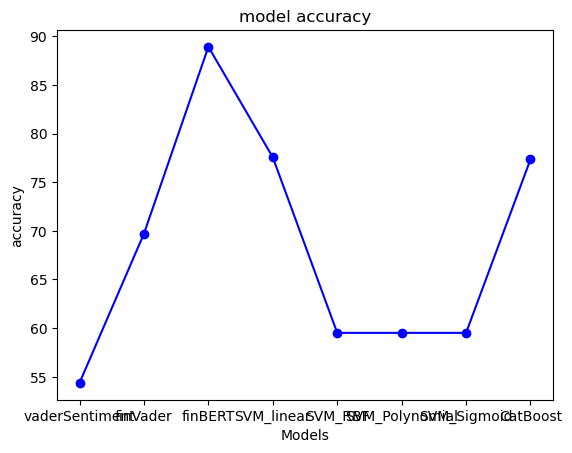

In [75]:

model_name = ["vaderSentiment", "finVader", "finBERT", "SVM_linear", "SVM_RBF", "SVM_Polynomial", "SVM_Sigmoid", "CatBoost"]
model_acc = [accuracy_vaderSentiment*100, accuracy_finVader*100,  accuracy_finBERT*100, accuracy_SVM_linear, accuracy_SVM_RBF, accuracy_SVM_Polynomial, accuracy_SVM_Sigmoid, accuracy_catBoost*100] 

plt.plot(model_name, model_acc, marker='o', linestyle='-', color='blue')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Models')

plt.show()

# Industry-based Classification

In [3]:
# Define keywords for each Nifty sector
nifty_categories = {
    'Auto': ["automobile", "auto", "car", "vehicle", "motor", "bike", "motorcycle", "scooter", "truck", "bus", "electric vehicle", "hybrid vehicle", "autonomous vehicle", "fuel efficiency", "engine", "transmission", "tire", "dealership", "showroom", "tata motors", "maruti suzuki", "mahindra & mahindra", "ashok leyland", "hero motocorp", "bajaj auto", "eicher motors", "tvs motor", "force motors", "yamaha", "honda", "ford", "tesla", "volkswagen", "general motors", "toyota", "hyundai", "fiat", "nissan", "volvo", "suzuki", "jaguar", "land rover", "renault", "skoda", "mercedes", "bmw", "audi", "kia", "mitsubishi", "porsche", "fuel station", "spare parts", "two-wheeler", "four-wheeler", "automotive industry", "ic engine", "battery", "electric charging", "automotive manufacturing", "road transport", "mobility solutions", "automotive sales", "automotive production", "automotive exports", "automotive imports", "automotive components", "automotive supply chain", "automotive technology", "automotive design", "automotive safety", "automotive regulations", "automotive emissions", "automotive trends", "automotive news", "automotive events", "automotive conferences", "automotive awards", "automotive stocks", "automotive ETFs", "automotive funds"
],
    'Bank': ["bank", "banking", "financial institution", "sbi", "hdfc bank", "icici bank", "axis bank", "kotak mahindra bank", "federal bank", "canara bank", "rbi", "reserve bank", "central bank", "monetary policy", "repo rate", "interest rate", "loans", "credit", "savings", "current account", "deposits", "mortgage", "housing loan", "personal loan", "business loan", "atm", "netbanking", "payment", "mobile banking", "digital payment", "debit card", "credit card", "overdraft", "loan restructuring", "non-performing asset", "asset recovery", "wealth management", "investment banking", "brokerage", "financial services", "pension fund", "debt securities", "loan default", "corporate banking", "foreign exchange", "treasury", "cheque", "demand draft", "retail banking", "financial inclusion", "fintech", "digital wallet", "fiscal policy", "liquidity", "GDP growth rate", "Inflation", "Fiscal deficit", "Monetary policy stance", "Government spending", "Tax rates", "Foreign direct investment", "FDI", "DII", "FII", "Remittances", "Trade balance", "Bank mergers and acquisitions", "Bank profitability", "Bank capital adequacy", "Bank NPA levels", "Bank provisioning", "Bank dividend payouts", "Bank digital transformation", "Bank cybersecurity", "Bank customer satisfaction", "Interest rate hikes", "Federal Reserve", "Geopolitical tensions", "Commodity prices", "Global economic slowdown", "NBFCs", "Microfinance institutions", "Credit bureaus", "Insurance companies", "Financial technology", "Fintech startups", "Regulatory changes"
],
    'Financial Services': ["finance", "financial", "investment", "mutual fund", "insurance", "broker", "nbfc", "wealth management", "asset management", "equity", "stock market", "bond", "capital market", "portfolio", "brokerage", "wealth", "hdfc life", "icici pru", "bajaj finserv", "sbi life", "lic", "pension plan", "retirement fund", "private equity", "hedge fund", "venture capital", "systematic investment plan", "ulip", "term insurance", "life insurance", "health insurance", "reinsurance", "claim", "policyholder", "solvency", "underwriting", "financial advisory", "financial planning", "sebi", "amfi", "depository", "fund manager", "credit rating", "credit risk", "financial derivatives", "futures", "options", "swaps", "commodities", "currency", "trading platform", "financial technology", "fintech", "robo-advisory", "financial regulation", "taxation", "income tax", "gst", "fiscal policy", "auditing", "accounting standards", "financial services", "financial markets", "financial products", "financial institutions", "financial instruments", "financial analysis", "financial reporting", "financial risk", "financial stability", "financial literacy", "financial inclusion", "financial aid", "financial crisis"
],
    'FMCG': ["fmcg", "fast moving consumer goods", "consumer products", "personal care", "household goods", "food", "beverage", "snacks", "unilever", "itc", "nestle", "britannia", "dabur", "marico", "colgate-palmolive", "pepsico", "coca-cola", "hul", "procter & gamble", "patanjali", "godrej consumer", "reckitt benckiser", "amul", "kellogg", "confectionery", "biscuit", "tea", "coffee", "packaged food", "dairy", "chocolate", "soap", "shampoo", "toothpaste", "detergent", "cleaning products", "deodorant", "skincare", "haircare", "beauty products", "hygiene", "hand sanitizer", "tissue paper", "bottled water", "soft drinks", "energy drinks", "packaged snacks", "frozen food", "processed food", "instant noodles", "ketchup", "cooking oil", "sugar", "salt", "ready-to-eat", "spices", "supermarket", "grocery", "retail", "distribution", "advertising", "consumer goods", "FMCG", "FMCG stocks", "FMCG sector", "FMCG industry", "FMCG companies", "FMCG trends", "FMCG news", "FMCG analysis", "FMCG research", "FMCG marketing", "FMCG strategy", "FMCG retail", "FMCG distribution", "FMCG supply chain", "FMCG innovation", "FMCG products", "FMCG brands", "FMCG consumption", "FMCG demand", "FMCG growth", "FMCG challenges", "FMCG opportunities", "FMCG regulation", "FMCG taxation", "FMCG exports", "FMCG imports", "FMCG competition", "FMCG mergers and acquisitions", "FMCG sustainability", "FMCG ethics", "FMCG social responsibility", "FMCG rural market", "FMCG urban market", "FMCG online sales", "FMCG offline sales", "FMCG customer behavior", "FMCG pricing", "FMCG packaging", "FMCG promotion", "FMCG advertising", "FMCG branding", "FMCG market share", "FMCG profitability", "FMCG valuation", "FMCG investment", "FMCG portfolio", "FMCG index", "FMCG ETFs", "FMCG funds", "FMCG derivatives", "FMCG futures", "FMCG options", "FMCG swaps", "FMCG commodities", "FMCG currency", "FMCG trading platform", "FMCG financial technology", "FMCG fintech", "FMCG robo-advisory", "FMCG financial regulation", "FMCG taxation", "FMCG income tax", "FMCG GST", "FMCG fiscal policy", "FMCG auditing", "FMCG accounting standards", "FMCG economic indicators", "FMCG inflation", "FMCG GDP growth", "FMCG consumer confidence", "FMCG disposable income", "FMCG lifestyle trends", "FMCG demographic changes", "FMCG cultural factors", "FMCG technological advancements", "FMCG global trends", "FMCG emerging markets", "FMCG developed markets", "FMCG regional trends", "FMCG country-specific trends", "FMCG seasonal trends", "FMCG holiday trends", "FMCG festival trends", "FMCG promotional events", "FMCG limited-time offers", "FMCG discounts", "FMCG loyalty programs", "FMCG customer satisfaction surveys", "FMCG market research reports", "FMCG industry analysis", "FMCG sector outlook", "FMCG company profiles", "FMCG product reviews", "FMCG brand comparisons", "FMCG price comparisons", "FMCG quality comparisons", "FMCG sustainability ratings", "FMCG ethical sourcing", "FMCG fair trade", "FMCG organic products", "FMCG natural products", "FMCG vegan products", "FMCG gluten-free products", "FMCG non-GMO products", "FMCG halal products", "FMCG kosher products", "FMCG diabetic-friendly products", "FMCG weight-management products", "FMCG sports nutrition products", "FMCG baby products", "FMCG pet products", "FMCG senior care products", "FMCG healthcare products", "FMCG pharmaceutical products", "FMCG medical devices", "FMCG healthcare services"
],
    'Healthcare': ["healthcare", "hospital", "health", "medical", "clinic", "diagnostic", "apollo", "fortis", "max healthcare", "medanta", "narayana health", "healthcare system", "healthcare insurance", "healthcare management", "nursing", "pathology", "laboratory", "surgery", "doctor", "surgeon", "physician", "telemedicine", "e-health", "digital health", "mental health", "healthcare technology", "electronic health records", "healthcare analytics", "health policy", "pharmaceutical", "drug development", "clinical trials", "biotechnology", "vaccine", "covid-19", "public health", "wellness", "alternative medicine", "ayurveda", "yoga", "fitness", "rehabilitation", "physiotherapy", "fertility clinic", "healthcare equipment", "medical devices", "dialysis", "cardiac care", "cancer treatment", "oncology", "radiology", "pediatrics", "emergency care", "health education", "home healthcare", "pharmaceutical sales", "over-the-counter medicine", "prescriptions", "health diagnostics", "health infrastructure", "healthcare industry", "healthcare market", "healthcare trends", "healthcare news", "healthcare analysis", "healthcare research", "healthcare marketing", "healthcare strategy", "healthcare retail", "healthcare distribution", "healthcare supply chain", "healthcare innovation", "healthcare products", "healthcare brands", "healthcare consumption", "healthcare demand", "healthcare growth", "healthcare challenges", "healthcare opportunities", "healthcare regulation", "healthcare taxation", "healthcare exports", "healthcare imports", "healthcare competition", "healthcare mergers and acquisitions", "healthcare sustainability", "healthcare ethics", "healthcare social responsibility", "healthcare rural market", "healthcare urban market", "healthcare online sales", "healthcare offline sales", "healthcare customer behavior", "healthcare pricing", "healthcare packaging", "healthcare promotion", "healthcare advertising", "healthcare branding", "healthcare market share", "healthcare profitability", "healthcare valuation", "healthcare investment", "healthcare portfolio", "healthcare index", "healthcare ETFs", "healthcare funds", "healthcare derivatives", "healthcare futures", "healthcare options", "healthcare swaps", "healthcare commodities", "healthcare currency", "healthcare trading platform", "healthcare financial technology", "healthcare fintech", "healthcare robo-advisory", "healthcare financial regulation", "healthcare taxation", "healthcare income tax", "healthcare GST", "healthcare fiscal policy", "healthcare auditing", "healthcare accounting standards", "healthcare economic indicators", "healthcare inflation", "healthcare GDP growth", "healthcare consumer confidence", "healthcare disposable income", "healthcare lifestyle trends", "healthcare demographic changes", "healthcare cultural factors", "healthcare technological advancements", "healthcare global trends", "healthcare emerging markets", "healthcare developed markets", "healthcare regional trends", "healthcare country-specific trends", "healthcare seasonal trends", "healthcare holiday trends", "healthcare festival trends", "healthcare promotional events", "healthcare limited-time offers", "healthcare discounts", "healthcare loyalty programs", "healthcare customer satisfaction surveys", "healthcare market research reports", "healthcare industry analysis", "healthcare sector outlook", "healthcare company profiles", "healthcare product reviews", "healthcare brand comparisons", "healthcare price comparisons", "healthcare quality comparisons", "healthcare sustainability ratings", "healthcare ethical sourcing", "healthcare fair trade", "healthcare organic products", "healthcare natural products", "healthcare vegan products", "healthcare gluten-free products", "healthcare non-GMO products", "healthcare halal products", "healthcare kosher products", "healthcare diabetic-friendly products", "healthcare weight-management products", "healthcare sports nutrition products", "healthcare baby products", "healthcare pet products", "healthcare senior care products", "healthcare healthcare products", "healthcare pharmaceutical products", "healthcare medical devices", "healthcare healthcare services"
],
    'IT': ["IT", "information technology", "software", "tech", "TCS", "Infosys", "Wipro", "HCL Technologies", "Tech Mahindra", "Cognizant", "Accenture", "IBM", "Oracle", "Microsoft", "Google", "cloud computing", "data science", "machine learning", "artificial intelligence", "cybersecurity", "software development", "software services", "ERP", "enterprise solutions", "digital transformation", "blockchain", "big data", "internet of things", "SaaS", "PaaS", "IaaS", "DevOps", "agile", "scrum", "python", "java", "software testing", "quality assurance", "SAP", "Oracle", "digital marketing", "website development", "app development", "UI/UX design", "AR/VR", "coding", "software architecture", "API", "fintech", "mobile app development", "IT consulting", "database management", "tech support", "business intelligence", "data analytics", "network security", "server infrastructure", "cloud migration", "digital services", "automation", "AI", "cloud infrastructure", "IT outsourcing", "IT industry", "IT market", "IT trends", "IT news", "IT analysis", "IT research", "IT marketing", "IT strategy", "IT retail", "IT distribution", "IT supply chain", "IT innovation", "IT products", "IT brands", "IT consumption", "IT demand", "IT growth", "IT challenges", "IT opportunities", "IT regulation", "IT taxation", "IT exports", "IT imports", "IT competition", "IT mergers and acquisitions", "IT sustainability", "IT ethics", "IT social responsibility", "IT rural market", "IT urban market", "IT online sales", "IT offline sales", "IT customer behavior", "IT pricing", "IT packaging", "IT promotion", "IT advertising", "IT branding", "IT market share", "IT profitability", "IT valuation", "IT investment", "IT portfolio", "IT index", "IT ETFs", "IT funds", "IT derivatives", "IT futures", "IT options", "IT swaps", "IT commodities", "IT currency", "IT trading platform", "IT financial technology", "IT fintech", "IT robo-advisory", "IT financial regulation", "IT taxation", "IT income tax", "IT GST", "IT fiscal policy", "IT auditing", "IT accounting standards", "IT economic indicators", "IT inflation", "IT GDP growth", "IT consumer confidence", "IT disposable income", "IT lifestyle trends", "IT demographic changes", "IT cultural factors", "IT technological advancements", "IT global trends", "IT emerging markets", "IT developed markets", "IT regional trends", "IT country-specific trends", "IT seasonal trends", "IT holiday trends", "IT festival trends", "IT promotional events", "IT limited-time offers", "IT discounts", "IT loyalty programs", "IT customer satisfaction surveys", "IT market research reports", "IT industry analysis", "IT sector outlook", "IT company profiles", "IT product reviews", "IT brand comparisons", "IT price comparisons", "IT quality comparisons", "IT sustainability ratings", "IT ethical sourcing", "IT fair trade", "IT organic products", "IT natural products", "IT vegan products", "IT gluten-free products", "IT non-GMO products", "IT halal products", "IT kosher products", "IT diabetic-friendly products", "IT weight-management products", "IT sports nutrition products", "IT baby products", "IT pet products", "IT senior care products", "IT healthcare products", "IT pharmaceutical products", "IT medical devices", "IT healthcare services"
],
    'Media': ["media", "news", "journalism", "print media", "tv", "broadcasting", "entertainment", "digital media", "advertising", "zee", "times group", "viacom", "sony pictures", "bollywood", "netflix", "prime video", "hotstar", "hbo", "youtube", "content creation", "film production", "movie", "cinema", "television show", "reality tv", "documentary", "newsroom", "journalism ethics", "investigative journalism", "journalism standards", "media company", "press", "journalism", "news outlet", "reporter", "news agency", "editor", "headline", "digital marketing", "media coverage", "press release", "social media", "influencer", "vlog", "radio", "podcast", "news broadcasting", "public relations", "media buying", "advertising agency", "creative agency", "journalism degree", "mass media", "audience engagement", "content monetization", "streaming service", "entertainment industry", "tv channel", "ott platform", "subscription model", "viewership ratings", "sponsorship"
],
    'Metal': ["metal", "steel", "mining", "aluminium", "zinc", "copper", "iron", "ore", "tata steel", "jsw steel", "vedanta", "hindalco", "coal india", "jindal", "smelting", "metalworks", "extraction", "raw materials", "metallurgy", "iron ore", "stainless steel", "ferrous metal", "non-ferrous metal", "alloy", "nickel", "gold", "silver", "platinum", "copper production", "aluminum production", "precious metals", "base metals", "metal prices", "mining rights", "exploration", "drilling", "metal refining", "furnace", "metal casting", "metal recycling", "industrial metals", "construction materials", "metal fabrication", "metal commodities", "metal exports", "commodity trading", "global demand", "supply chain", "smelter", "energy consumption", "metal market trends", "raw material sourcing"
],
    'Pharmaceutical': ["pharmaceutical", "pharma", "drug", "medicine", "vaccination", "antibiotics", "api", "generics", "biosimilars", "clinical trials", "drug development", "glenmark", "cipla", "dr. reddy's", "sun pharma", "lupin", "biocon", "novartis", "pfizer", "johnson & johnson", "astrazeneca", "sanofi", "merck", "fda approval", "drug patent", "intellectual property", "prescription drugs", "over-the-counter medicine", "pharmacy", "chemicals", "biotechnology", "immunology", "oncology", "cardiology", "neurology", "psychiatry", "vaccine", "covid-19 vaccine", "vaccine rollout", "pharmaceutical sales", "medicinal chemistry", "pharmaceutical research", "toxicology", "pharmaceutical manufacturing", "drug formulation", "drug interaction", "side effects", "dosage", "pharmacology", "biopharmaceutical", "healthcare", "mental health drugs", "antiviral", "antibiotic resistance", "drug regulation", "clinical research", "medical devices", "drug testing", "treatment", "pharmacist", "pharmaceutical logistics"
],
    'Realty': ["real estate", "realty", "property", "construction", "housing", "commercial real estate", "residential real estate", "builder", "construction company", "dlf", "godrej properties", "prestige estates", "sobha", "lodha", "brigade", "piramal realty", "real estate development", "urban development", "real estate investment", "property development", "luxury housing", "affordable housing", "office space", "commercial leasing", "rental", "lease", "land acquisition", "land valuation", "property market", "real estate financing", "mortgage", "home loan", "property registration", "real estate regulation", "rera", "urban planning", "infrastructure", "housing demand", "housing supply", "construction materials", "cement", "steel", "building contractor", "property management", "real estate agent", "housing society", "real estate trends", "smart cities", "urbanization", "gated communities", "townships", "real estate taxes", "property tax", "real estate law", "zoning regulations", "property dispute", "builder lobby", "housing finance"
],
    'Consumer Durables': ["consumer durables", "home appliances", "electrical appliances", "kitchen appliances", "refrigerator", "air conditioner", "washing machine", "microwave", "television", "lcd tv", "led tv", "smart tv", "audio system", "home theater", "water heater", "fan", "mixer grinder", "vacuum cleaner", "geysers", "oven", "stove", "induction cooktop", "toaster", "iron", "dryer", "electronic goods", "durable goods", "white goods", "haier", "lg", "samsung", "voltas", "whirlpool", "bosch", "ifb", "godrej appliances", "videocon", "panasonic", "sony", "electronics", "consumer electronics", "durable products", "luxury appliances", "household appliances", "home automation", "smart appliances", "energy efficiency", "product warranty", "after-sales service", "home improvement", "air purifiers", "water purifiers", "electric fan", "cooler", "smart home devices", "energy-saving", "product features", "digital display", "smart features", "domestic appliance", "automated systems", "premium appliances"
],
    'Oil and Gas': ["oil", "gas", "petroleum", "crude oil", "natural gas", "refinery", "oil production", "gas extraction", "ongc", "reliance industries", "indian oil", "bharat petroleum", "hpcl", "oil india", "oil exploration", "gas pipeline", "liquefied natural gas", "diesel", "petrol", "fuel", "gasoline", "lubricants", "offshore drilling", "oil fields", "oil rigs", "energy companies", "petrochemical", "hydrocarbon", "oil refinery", "fossil fuels", "energy sector", "global oil prices", "oil reserves", "oil imports", "oil exports", "energy consumption", "fuel demand", "gas distribution", "cng", "lng", "oil storage", "energy policy", "oil infrastructure", "energy security", "oil supply chain", "oil exploration", "oil spills", "refining capacity", "oil transportation", "energy transition", "renewable energy", "solar energy", "wind energy", "climate change", "carbon emissions", "fuel efficiency", "petroleum products", "diesel subsidy", "electricity generation", "petrochemical plants"
]
}

In [4]:
# Function to classify text based on keywords
def classify_text(text):
    text = str(text).lower()  # Convert text to lowercase for keyword matching
    for category, keywords in nifty_categories.items():
        if any(keyword in text for keyword in keywords):
            return category
    return 'Other'  # If no keywords are found, classify as 'Other'



In [5]:
# Apply classification to the 'Text' column and create a new 'Category' column
df['Category'] = df['Text'].apply(classify_text)

# Display the first few rows of the updated dataframe
df[['Text', 'Category']].head()

NameError: name 'df' is not defined

In [39]:
df.describe()

,Sentiment,Text,Category
count,4837,4837,4837
unique,3,4807,13
top,neutral,operating profit rose to eur mn from eur mn ...,Other
freq,2871,6,2359


In [40]:
df['Category'].unique()

array(['IT', 'Other', 'Metal', 'Auto', 'Bank', 'Oil and Gas', 'FMCG',
       'Financial Services', 'Media', 'Pharmaceutical', 'Realty',
       'Healthcare', 'Consumer Durables'], dtype=object)

In [42]:
# df.to_csv('data_7_10.csv')

In [62]:
for i in nifty_categories.keys():
    print(i, ":",len(df[df.Category == i]))
    
print('Other', ":",len(df[df.Category == 'Other']))

Auto : 701
Bank : 208
Financial Services : 413
FMCG : 164
Healthcare : 37
IT : 147
Media : 181
Metal : 320
Pharmaceutical : 92
Realty : 132
Consumer Durables : 45
Oil and Gas : 38
Other : 2359


# Time-Series Analysis

In [ ]:
#dataset taken for news with dates
df_ts = pd.read_csv('IndianFinancialNews.csv')

In [6]:
df_ts.head()

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [7]:
df_ts = df_ts.sort_values(by='Date')

In [8]:
df_ts

,Unnamed: 0,Date,Title,Description
49723,49723,"April 01, 2003, Tuesday",Mint St Seeks Faster Reforms,Mint St Seeks Faster Reforms
49722,49722,"April 01, 2003, Tuesday",Amber Flashed Over Monetary Policy Constraints,Amber Flashed Over Monetary Policy Constraints
49721,49721,"April 01, 2003, Tuesday",India Behind Many Emerging Economies On Fdi,India Behind Many Emerging Economies On Fdi
49720,49720,"April 01, 2003, Tuesday",Banks Sitting On Food Credit Timebomb,Banks Sitting On Food Credit Timebomb
49719,49719,"April 01, 2003, Tuesday",Market Reports,Market Reports
...,...,...,...,...
1410,1410,"September 30, 2019, Monday",YES Bank stock falls 15% as investors worry ov...,"According to a report, YES Bank had an exposur..."
1411,1411,"September 30, 2019, Monday",RBI's June 7 circular raises NPA woes for merg...,Fear delay in execution of resolution plans du...
1412,1412,"September 30, 2019, Monday",HDFC bank takes on e-commerce giants with disc...,The bank also listed out targets for merchant ...
1413,1413,"September 30, 2019, Monday",PMC Bank doesn't pose a systemic threat but it...,Given the extent of current nervousness in the...


In [ ]:
# convert date to a universal format
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

In [ ]:
# Using a subset of the dataset to quickly validate the program's functionality, saving time on training and testing ML models
df_ts_500 = df_ts[(df_ts['Date'] > '2005-07-01') & (df_ts['Date'] < '2006-01-01')]

In [15]:
df_ts_500 = df_ts_500.sort_values(by='Date')

In [16]:
df_ts_500.head()

,Unnamed: 0,Date,Title,Description
43519,43519,2005-07-02,India's forex reserves down by $676mn,India's foreign exchange reserves declined by ...
43522,43522,2005-07-02,"SBI planning to lower business costs, bad loans",State Bank of India (SBI) plans to bring down ...
43525,43525,2005-07-02,Banks told to cap realty exposure,The Reserve Bank of India (RBI) yesterday inst...
43526,43526,2005-07-02,"Attention job seekers, banks are on the prowl",Leading global private banks are in a tearing ...
43520,43520,2005-07-02,Syndicate Bank may merge 4 RRBs,Syndicate Bank may merge four of its regional ...


## FinBERT

In [39]:
# !pip install transformers torch

In [17]:
import scipy
import torch

In [18]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
import warnings
warnings.filterwarnings("ignore")

D:\Anaconda\Anaconda_Software\envs\SentimentAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
#Then, from the HuggingFace Model Hub, we'll download the pre-trained tokenizer, 
# which is used to convert text into tokens that NLP models can understand. 
# We also load the pre-trained model itself in a similar way. 

X = df_ts_500['Description'].to_list()
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [20]:
positive = []
negative = []
neutral = []
preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model_finbert(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip( 
            model_finbert.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    positive.append(scores["positive"])
    negative.append(scores["negative"])
    neutral.append(scores["neutral"])
    sentimentFinbert = max(scores, key=scores.get)
    probabilityFinbert = max(scores.values())
    preds.append(sentimentFinbert)
    preds_proba.append(probabilityFinbert)

In [21]:
scores.values()

dict_values([0.1331781, 0.007858445, 0.8589635])

In [22]:
scores

{'positive': 0.1331781, 'negative': 0.007858445, 'neutral': 0.8589635}

In [23]:
sentimentFinbert

'neutral'

In [24]:
probabilityFinbert

0.8589635

In [25]:
df_ts_500['pos_finBert'] = positive
df_ts_500['neg_finBert'] = negative
df_ts_500['neu_finBert'] = neutral


In [26]:
df_ts_500.head()

,Unnamed: 0,Date,Title,Description,pos_finBert,neg_finBert,neu_finBert
43519,43519,2005-07-02,India's forex reserves down by $676mn,India's foreign exchange reserves declined by ...,0.007398,0.974897,0.017704
43522,43522,2005-07-02,"SBI planning to lower business costs, bad loans",State Bank of India (SBI) plans to bring down ...,0.898115,0.053908,0.047977
43525,43525,2005-07-02,Banks told to cap realty exposure,The Reserve Bank of India (RBI) yesterday inst...,0.343464,0.034381,0.622155
43526,43526,2005-07-02,"Attention job seekers, banks are on the prowl",Leading global private banks are in a tearing ...,0.226346,0.018264,0.755389
43520,43520,2005-07-02,Syndicate Bank may merge 4 RRBs,Syndicate Bank may merge four of its regional ...,0.024220,0.058611,0.917169


In [27]:
df_ts_500.tail()

,Unnamed: 0,Date,Title,Description,pos_finBert,neg_finBert,neu_finBert
42242,42242,2005-12-31,Vijaya Bank speeds up CBS implementation,"Vijaya Bank, on Friday, said it has implemente...",0.809564,0.006775,0.183661
42240,42240,2005-12-31,HDFC Chubb enters liability insurance,HDFC Chubb General Insurance is foraying into ...,0.271320,0.006969,0.721710
42247,42247,2005-12-31,Current account deficit widens,Figure in the first half already 2.38 times th...,0.171388,0.517888,0.310724
42241,42241,2005-12-31,Bajaj Allianz to offer cashless treatment,"The joint venture company, Bajaj Allianz Life ...",0.378630,0.013896,0.607474
42245,42245,2005-12-31,"Peerless, ICICI plan co-branded card",The Peerless General Finance & Investment Comp...,0.133178,0.007858,0.858963


## Classification function call

In [ ]:
# classify the smaller dataset
df_ts_500['Category'] = df_ts_500['Description'].apply(classify_text)

In [29]:
df_ts_500.head()

,Unnamed: 0,Date,Title,Description,pos_finBert,neg_finBert,neu_finBert,Category
43519,43519,2005-07-02,India's forex reserves down by $676mn,India's foreign exchange reserves declined by ...,0.007398,0.974897,0.017704,Bank
43522,43522,2005-07-02,"SBI planning to lower business costs, bad loans",State Bank of India (SBI) plans to bring down ...,0.898115,0.053908,0.047977,Bank
43525,43525,2005-07-02,Banks told to cap realty exposure,The Reserve Bank of India (RBI) yesterday inst...,0.343464,0.034381,0.622155,Bank
43526,43526,2005-07-02,"Attention job seekers, banks are on the prowl",Leading global private banks are in a tearing ...,0.226346,0.018264,0.755389,Bank
43520,43520,2005-07-02,Syndicate Bank may merge 4 RRBs,Syndicate Bank may merge four of its regional ...,0.024220,0.058611,0.917169,Bank


In [30]:
df_ts_500.tail()

,Unnamed: 0,Date,Title,Description,pos_finBert,neg_finBert,neu_finBert,Category
42242,42242,2005-12-31,Vijaya Bank speeds up CBS implementation,"Vijaya Bank, on Friday, said it has implemente...",0.809564,0.006775,0.183661,Bank
42240,42240,2005-12-31,HDFC Chubb enters liability insurance,HDFC Chubb General Insurance is foraying into ...,0.271320,0.006969,0.721710,Auto
42247,42247,2005-12-31,Current account deficit widens,Figure in the first half already 2.38 times th...,0.171388,0.517888,0.310724,Other
42241,42241,2005-12-31,Bajaj Allianz to offer cashless treatment,"The joint venture company, Bajaj Allianz Life ...",0.378630,0.013896,0.607474,Bank
42245,42245,2005-12-31,"Peerless, ICICI plan co-branded card",The Peerless General Finance & Investment Comp...,0.133178,0.007858,0.858963,Bank


In [31]:
for i in nifty_categories.keys():
    print(i, ":",len(df_ts_500[df_ts_500.Category == i]))
    
print('Other', ":",len(df_ts_500[df_ts_500.Category == 'Other']))

Auto : 106
Bank : 825
Financial Services : 202
FMCG : 10
Healthcare : 0
IT : 3
Media : 0
Metal : 29
Pharmaceutical : 5
Realty : 1
Consumer Durables : 0
Oil and Gas : 3
Other : 104


## AngelOne API for Historical data

In [26]:
pip install smartapi-python

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install logzero

  Using cached logzero-1.7.0-py2.py3-none-any.whl.metadata (11 kB)
Using cached logzero-1.7.0-py2.py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install pyotp

  Using cached pyotp-2.9.0-py3-none-any.whl.metadata (9.8 kB)
Using cached pyotp-2.9.0-py3-none-any.whl (13 kB)Note: you may need to restart the kernel to use updated packages.



In [76]:
from SmartApi import SmartConnect 
#or from smartapi.smartConnect import SmartConnect
import pyotp as pyo
from logzero import logger

In [ ]:
obj=SmartConnect(api_key="__")

[I 241110 14:05:38 smartConnect:124] in pool


In [ ]:
data = obj.generateSession("__","__",pyo.TOTP("__").now())

In [79]:
refreshToken= data['data']['refreshToken']

In [80]:
#fetch the feedtoken
feedToken=obj.getfeedToken()

In [81]:
#fetch User Profile
userProfile= obj.getProfile(refreshToken)

In [ ]:
# symboltoken is for nifty Bank
try:
    historicParam={
    "exchange": "NSE",
    "symboltoken": "99926009",
    "interval": "ONE_DAY",
    "fromdate": "2024-01-01 09:15", 
    "todate": "2025-06-30 03:30"
    }
    obj.getCandleData(historicParam)
except Exception as e:
    print("Historic Api failed: {}".format(e.message))

In [113]:
# response format :  [timestamp, open, high, low, close, volume]
obj.getCandleData(historicParam)

{'status': True,
 'message': 'SUCCESS',
 'errorcode': '',
 'data': [['2024-01-02T00:00:00+05:30',
   48194.8,
   48223.55,
   47689.8,
   47761.65,
   0],
  ['2024-01-03T00:00:00+05:30', 47796.3, 47798.75, 47481.35, 47704.95, 0],
  ['2024-01-04T00:00:00+05:30', 47805.4, 48281.2, 47738.15, 48195.85, 0],
  ['2024-01-05T00:00:00+05:30', 48245.55, 48381.95, 47822.85, 48159.0, 0],
  ['2024-01-08T00:00:00+05:30', 48096.65, 48154.5, 47387.35, 47450.25, 0],
  ['2024-01-09T00:00:00+05:30', 47705.4, 47939.3, 47156.05, 47242.65, 0],
  ['2024-01-10T00:00:00+05:30', 47073.85, 47423.45, 47010.8, 47360.85, 0],
  ['2024-01-11T00:00:00+05:30', 47538.6, 47662.1, 47237.0, 47438.35, 0],
  ['2024-01-12T00:00:00+05:30', 47572.7, 47873.7, 47408.5, 47709.8, 0],
  ['2024-01-15T00:00:00+05:30', 47891.05, 48248.05, 47825.4, 48158.3, 0],
  ['2024-01-16T00:00:00+05:30', 48109.95, 48305.4, 48002.85, 48125.1, 0],
  ['2024-01-17T00:00:00+05:30', 46573.95, 47212.75, 45979.6, 46064.45, 0],
  ['2024-01-18T00:00:00+05:30

In [32]:
historicalData = pd.read_csv('HistoricalDataNiftyBank.csv')

In [33]:
historicalData

,Unnamed: 0,timestamp,open,high,low,close,volume
0,0,2005-06-10T00:00:00+05:30,3640.05,3665.80,3585.80,3593.55,0
1,1,2005-06-13T00:00:00+05:30,3593.90,3648.40,3556.70,3642.90,0
2,2,2005-06-14T00:00:00+05:30,3649.05,3696.35,3637.70,3689.80,0
3,3,2005-06-15T00:00:00+05:30,3700.80,3703.75,3662.85,3683.85,0
4,4,2005-06-16T00:00:00+05:30,3684.40,3685.75,3607.20,3618.80,0
...,...,...,...,...,...,...,...
5472,5472,2024-11-04T00:00:00+05:30,51764.50,51764.50,51066.80,51215.25,0
5473,5473,2024-11-05T00:00:00+05:30,51052.60,52289.55,50865.45,52207.25,0
5474,5474,2024-11-06T00:00:00+05:30,52440.40,52493.95,52185.40,52317.40,0
5475,5475,2024-11-07T00:00:00+05:30,52258.95,52377.25,51752.25,51916.50,0


In [ ]:
# change date to universal format
historicalData['timestamp'] = pd.to_datetime(historicalData['timestamp'])

In [35]:
historicalData = historicalData.rename(columns={"timestamp": "Date"})


In [36]:
historicalData

,Unnamed: 0,Date,open,high,low,close,volume
0,0,2005-06-10 00:00:00+05:30,3640.05,3665.80,3585.80,3593.55,0
1,1,2005-06-13 00:00:00+05:30,3593.90,3648.40,3556.70,3642.90,0
2,2,2005-06-14 00:00:00+05:30,3649.05,3696.35,3637.70,3689.80,0
3,3,2005-06-15 00:00:00+05:30,3700.80,3703.75,3662.85,3683.85,0
4,4,2005-06-16 00:00:00+05:30,3684.40,3685.75,3607.20,3618.80,0
...,...,...,...,...,...,...,...
5472,5472,2024-11-04 00:00:00+05:30,51764.50,51764.50,51066.80,51215.25,0
5473,5473,2024-11-05 00:00:00+05:30,51052.60,52289.55,50865.45,52207.25,0
5474,5474,2024-11-06 00:00:00+05:30,52440.40,52493.95,52185.40,52317.40,0
5475,5475,2024-11-07 00:00:00+05:30,52258.95,52377.25,51752.25,51916.50,0


## Merge data and historical Data

In [ ]:
# taking only bank category of news as we are merging with historical data of BANK NIFTY
df_500_bank = df_ts_500[df_ts_500['Category'] ==  'Bank']

In [ ]:
# checking if all are of the category, Bank
all_bank = (df_500_bank['Category'] == 'Bank').all()

In [55]:
all_bank

True

In [76]:
df_500_bank.head()

,Unnamed: 0,Date,Title,Description,pos_finBert,neg_finBert,neu_finBert,Category
43519,43519,2005-07-02,India's forex reserves down by $676mn,India's foreign exchange reserves declined by ...,0.007398,0.974897,0.017704,Bank
43522,43522,2005-07-02,"SBI planning to lower business costs, bad loans",State Bank of India (SBI) plans to bring down ...,0.898115,0.053908,0.047977,Bank
43525,43525,2005-07-02,Banks told to cap realty exposure,The Reserve Bank of India (RBI) yesterday inst...,0.343464,0.034381,0.622155,Bank
43526,43526,2005-07-02,"Attention job seekers, banks are on the prowl",Leading global private banks are in a tearing ...,0.226346,0.018264,0.755389,Bank
43520,43520,2005-07-02,Syndicate Bank may merge 4 RRBs,Syndicate Bank may merge four of its regional ...,0.024220,0.058611,0.917169,Bank


In [ ]:
# universal date format
historicalData['Date'] = historicalData['Date'].dt.tz_localize(None)

In [71]:
historicalData.head()

,Unnamed: 0,Date,open,high,low,close,volume
0,0,2005-06-10,3640.05,3665.80,3585.80,3593.55,0
1,1,2005-06-13,3593.90,3648.40,3556.70,3642.90,0
2,2,2005-06-14,3649.05,3696.35,3637.70,3689.80,0
3,3,2005-06-15,3700.80,3703.75,3662.85,3683.85,0
4,4,2005-06-16,3684.40,3685.75,3607.20,3618.80,0


In [ ]:
# left inner join on historical data and new dataset
merged_df_bank = pd.merge(historicalData, df_500_bank, on='Date', how='left')

In [91]:
merged_df_bank.head()

,Unnamed: 0_x,Date,open,high,low,close,volume,Unnamed: 0_y,Title,Description,pos_finBert,neg_finBert,neu_finBert,Category
0,0,2005-06-10,3640.05,3665.80,3585.80,3593.55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2005-06-13,3593.90,3648.40,3556.70,3642.90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2005-06-14,3649.05,3696.35,3637.70,3689.80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2005-06-15,3700.80,3703.75,3662.85,3683.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2005-06-16,3684.40,3685.75,3607.20,3618.80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
merged_df_bank.tail()

,Unnamed: 0_x,Date,open,high,low,close,volume,Unnamed: 0_y,Title,Description,pos_finBert,neg_finBert,neu_finBert,Category
6020,5472,2024-11-04,51764.50,51764.50,51066.80,51215.25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6021,5473,2024-11-05,51052.60,52289.55,50865.45,52207.25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6022,5474,2024-11-06,52440.40,52493.95,52185.40,52317.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023,5475,2024-11-07,52258.95,52377.25,51752.25,51916.50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6024,5476,2024-11-08,51869.15,52007.15,51494.00,51561.20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
merged_df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0_x  6025 non-null   int64         
 1   Date          6025 non-null   datetime64[ns]
 2   open          6025 non-null   float64       
 3   high          6025 non-null   float64       
 4   low           6025 non-null   float64       
 5   close         6025 non-null   float64       
 6   volume        6025 non-null   int64         
 7   Unnamed: 0_y  670 non-null    float64       
 8   Title         670 non-null    object        
 9   Description   670 non-null    object        
 10  pos_finBert   670 non-null    float32       
 11  neg_finBert   670 non-null    float32       
 12  neu_finBert   670 non-null    float32       
 13  Category      670 non-null    object        
dtypes: datetime64[ns](1), float32(3), float64(5), int64(2), object(3)
memory usage: 588.5+ K

## LSTM

In [102]:
pip install keras

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 558.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.5/1.2 MB 558.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.5/1.2 MB 558.9 kB/s eta 0:00:02
   -------------------------- ------------- 0.8/1.2 MB 541.1 kB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 541.1 kB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 541.1 kB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 445.3 kB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 445.3 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 464.4 kB/s eta 0:00:00
   -------------------

In [104]:
pip install tensorflow

  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 730.2 kB/s eta 0:08:54
   ---------------------------------------- 0.5/390.3 MB 730.2 kB/s eta 0:08:54
   ---------------------------------------- 0.8/390.3 MB 745.8 kB/s eta 0:08:43
   ---------------------------------------- 1.0/390.3 MB 740.5 kB/s eta 0:08:46
   ---------------------------------------- 1.0/390.3 MB 740.5 kB/s eta 0:08:46
   ---------------------------------------- 1.3/390.3 MB 737.4 kB/s eta 0:08:48
   ---------------------------------------- 1.3/390.3 MB 737.4 kB/s eta 0:08:48
   ---------------------------------------- 1.6/390.3 MB 742.2 kB/s eta 0:08:44
   ------

In [ ]:
# replace all Nan values with 0, a neutral sentiment of news
merged_df_bank.fillna(0.0, inplace=True)


In [95]:
merged_df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0_x  6025 non-null   int64         
 1   Date          6025 non-null   datetime64[ns]
 2   open          6025 non-null   float64       
 3   high          6025 non-null   float64       
 4   low           6025 non-null   float64       
 5   close         6025 non-null   float64       
 6   volume        6025 non-null   int64         
 7   Unnamed: 0_y  6025 non-null   float64       
 8   Title         6025 non-null   object        
 9   Description   6025 non-null   object        
 10  pos_finBert   6025 non-null   float32       
 11  neg_finBert   6025 non-null   float32       
 12  neu_finBert   6025 non-null   float32       
 13  Category      6025 non-null   object        
dtypes: datetime64[ns](1), float32(3), float64(5), int64(2), object(3)
memory usage: 588.5+ K

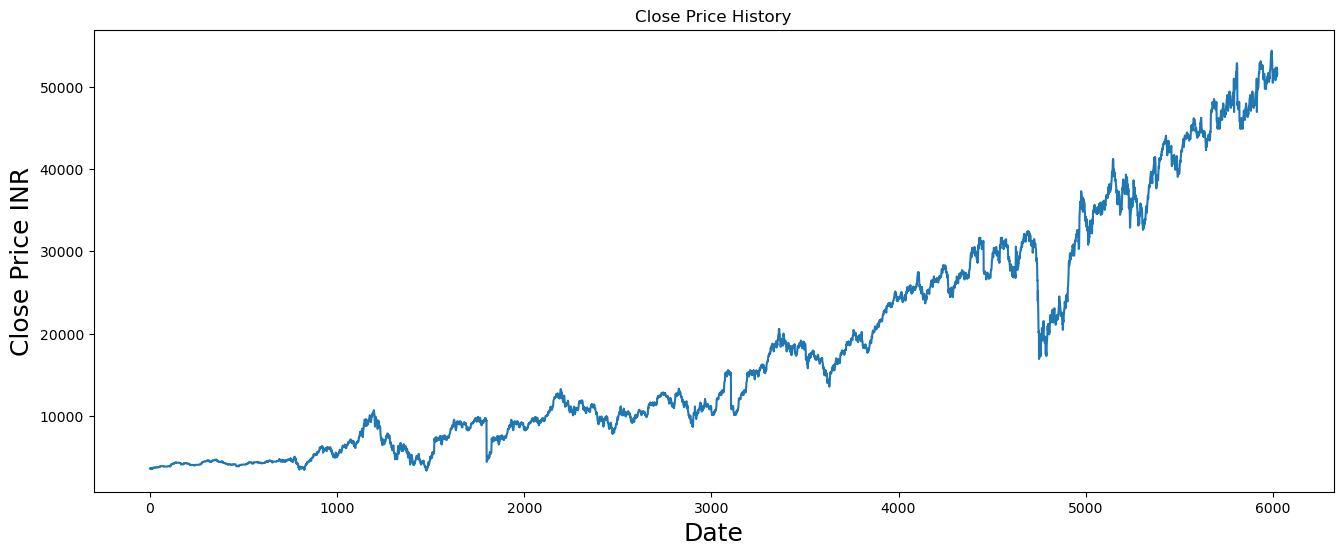

In [97]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(merged_df_bank['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [98]:
# Create a new dataframe with only the 'Close column 
target_data = merged_df_bank.filter(['close'])

# Convert the dataframe to a numpy array
target_dataset = target_data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(target_dataset) * .95 ))

training_data_len

5724

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(target_dataset)

scaled_data

array([[0.00497397],
       [0.00594095],
       [0.00685991],
       ...,
       [0.95967623],
       [0.95182093],
       [0.94485913]])

In [100]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00497397, 0.00594095, 0.00685991, 0.00674333, 0.00546873,
       0.00501806, 0.00376306, 0.00465949, 0.00433423, 0.00529826,
       0.00508272, 0.00503178, 0.00427348, 0.00483877, 0.00585277,
       0.00664633, 0.00748105, 0.00748105, 0.00748105, 0.00748105,
       0.00709994, 0.00709994, 0.00709994, 0.00709994, 0.00709994,
       0.00709994, 0.00709994, 0.00709994, 0.0082217 , 0.0082217 ,
       0.0082217 , 0.0082217 , 0.0082217 , 0.00747419, 0.00747419,
       0.00747419, 0.00747419, 0.00747419, 0.00747419, 0.00747419,
       0.00747419, 0.00847447, 0.00847447, 0.00847447, 0.00847447,
       0.00847447, 0.00847447, 0.00847447, 0.00847447, 0.00847447,
       0.00847447, 0.00989994, 0.00989994, 0.00989994, 0.00989994,
       0.00989994, 0.01082675, 0.01082675, 0.01082675, 0.01082675])]
[0.010826745618014083]

[array([0.00497397, 0.00594095, 0.00685991, 0.00674333, 0.00546873,
       0.00501806, 0.00376306, 0.00465949, 0.00433423, 0.00529826,
       0.00508272, 0.00503178, 0.0

In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5664/5664 ━━━━━━━━━━━━━━━━━━━━ 203s 35ms/step - loss: 9.8770e-04


In [134]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = target_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


4554.802606620427

In [149]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error

# Get the root mean squared error (RMSE)
rmse = root_mean_squared_error(y_test, predictions)
print('RMSE: ', rmse)


mape = mean_absolute_percentage_error(y_test, predictions)
print("MAPE: ", mape)

RMSE:  4554.802606620427
MAPE:  0.09164877057615102


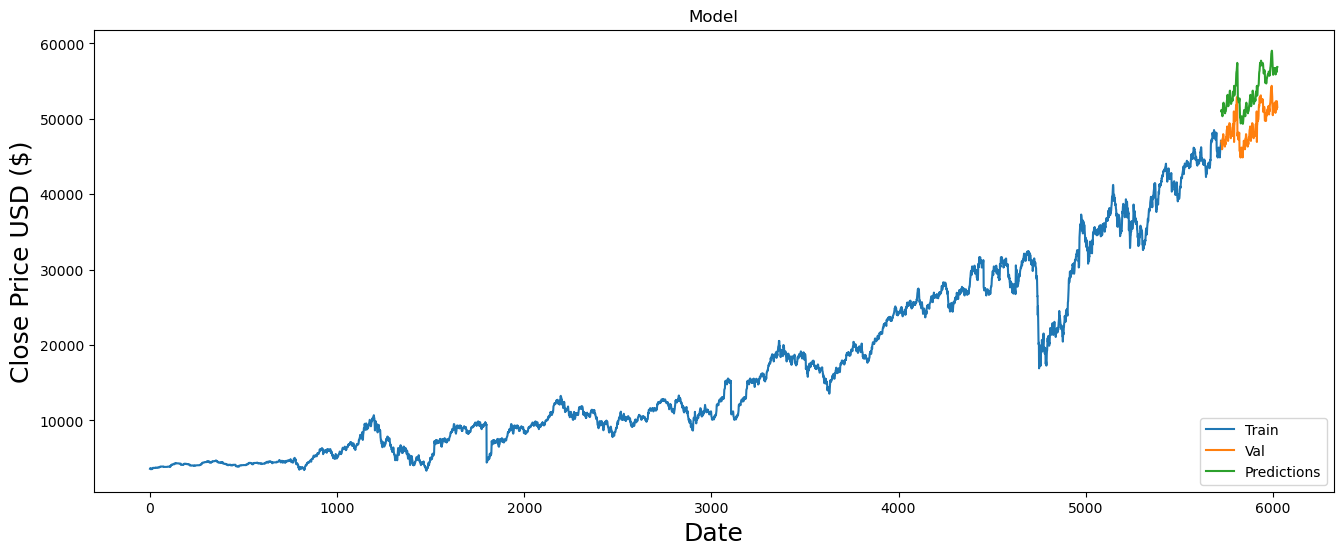

In [150]:
train = target_data[:training_data_len]
valid = target_data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
valid

,close,Predictions
5724,47019.70,0.933991
5725,46919.80,0.937140
5726,46811.75,0.937004
5727,46576.50,0.935170
5728,46588.05,0.931655
...,...,...
6020,51215.25,1.041016
6021,52207.25,1.035909
6022,52317.40,1.042572
6023,51916.50,1.049346
